#   Title: Heart Disease prediction
`Author`: M.Ahmed Raza\
`Date`: 17FEB2024\
`Dataset`: UCI Heart Disease

### Meta Data
About Dataset
Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
    * 1.typical angina
    * 2.atypical angina 
    * 3.non-anginal
    * 4.asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
  
### Acknowledgements
### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.\
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.\
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.\
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.\
### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims & Objectives

In [ ]:
#import libraries
#1. to handle the data
import pandas as pd 
import numpy as np
#2. to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#3. to process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
#4. to import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#5. for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
#6. for classfication
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#7. to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load dataset locally
df = pd.read_csv('./heart_disease_uci.csv')
df.head()

# Exploratory data analysis

## Age Column

In [ ]:
# Exploring datypes
df.info()

In [ ]:
df.shape

In [63]:
df.age.describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
# null values
df.isnull().sum

In [ ]:
# print mean of age
print(f'Most of the people with heart disease have ages between {df["age"].min()} and {df["age"].max()}')
print(f'Mean age for heart disease is {int(df["age"].mean())}')
print(f'Median age for heart disease is {int(df["age"].median())}')
print(f'MOD of age with heart disease is {int(df["age"].mode()[0])}')



In [ ]:
sns.histplot(df['age'], kde=True)
#plot the mean, median and mod of the age
plt.axvline(x=df['age'].mean(), color='red', label='mean')
plt.axvline(x=df['age'].median(), color='blue', label='median')
plt.axvline(x=df['age'].mode()[0], color='yellow', label='mode')
plt.legend()
plt.show()

Lets explore it by gender wise

In [ ]:
#plot histogram of age distribution by sex using plotly
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [ ]:
#find the value count of sex column
df['sex'].value_counts()

In [ ]:
#print percentage of male and female
df['sex'].value_counts(normalize=True)

In [ ]:
# how much male is more than female
male_proportion = 0.78913
female_proportion = 0.21087

ratio = male_proportion / female_proportion
print("The value of males is", ratio, "times larger than females.")

In [ ]:
#find the value count og age column groupby sex
df['age'].groupby(df['sex']).value_counts()

## Dataset Column


In [37]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [38]:
df.dataset.value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

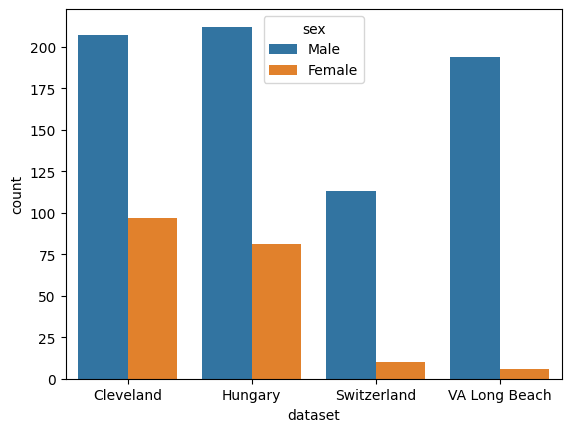

In [41]:
#plot the value count of dataset hue by sex
sns.countplot(data=df, x='dataset', hue='sex')
plt.show()

In [42]:
#plot dataset using plotly hue sex
fig = px.histogram(df, x='dataset', color='sex')
fig.show()

In [43]:
#make a plotly plot of age column hue dataset
fig = px.histogram(df, x='age', color='dataset')
fig.show()

In [58]:
#print the mean median and mod of age groupby dataset
print(f" Mean and Median are: {df['age'].groupby(df['dataset']).agg(['mean', 'median'])}")
#print mod of age groupby dataset
print(f"MOD is:{df.groupby('dataset')['age'].agg(pd.Series.mode)}")

 Mean and Median are:                     mean  median
dataset                         
Cleveland      54.351974    55.5
Hungary        47.894198    49.0
Switzerland    55.317073    56.0
VA Long Beach  59.350000    60.0
MOD is:dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


## CP column

In [60]:
df.cp.value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

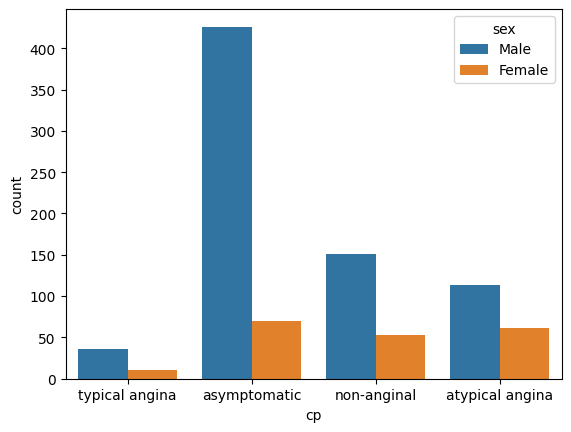

In [61]:
#count plot of cp by sex
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

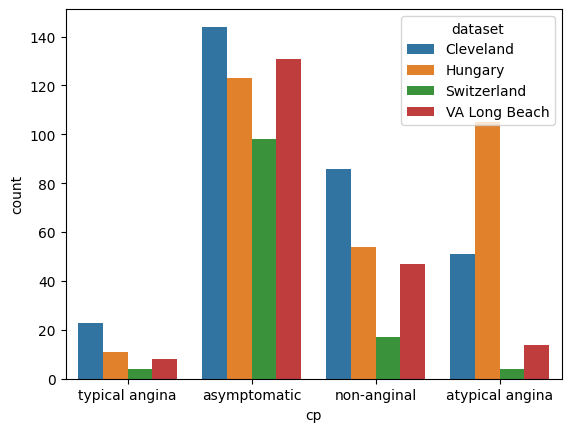

In [62]:
# count plot of cp by dataset
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

In [59]:
# draw a plotly plot of age groupby cp
fig = px.histogram(df, x='age', color='cp')
fig.show()

## trestbps column
the normal resting blood pressure is 120/80

In [66]:
df.trestbps.describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [67]:
df.trestbps.isnull().sum()

59

In [71]:
#impute missing vlaues of trestbps with iterative imputer

#create iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)
#fit and transform
df['trestbps_imputed'] = imputer.fit_transform(df[['trestbps']])
#check and rint
# Check and print the imputed values for 'trestbps'
print(f'Missing value are {df["trestbps_imputed"].isnull().sum()}')



Missing value are 0


## Outputs:
1. People get heart disease between age 27-77
2. Mean age for heart disease is 53
3. Median age for heart disease is 54
4. MOD of age with heart disease is 54
5. Most of the males and females get heart disease between age 54-55
6. 78% pateients are Male and 21% patients are female
8. There are 3.74 times more male heart patients than female
   1. The highest number of females are from clevland and lowest from Switzerland
   2.  The highest number of males are from Hungary and lowest from Switzerland
9. In every country the mean median and mod value of age is different:
   1.  Cleaveland has mean age of 54, median age 55, mod 58
   2.  Hungary has mean age of 48, median age 49, mod 54
   3.  Switzerland hhas mean age of 55, median age 56, mod 61
   4.  VA long beach has mean age of 59, median age 60 , mod 62,63
10. Observation about cp